In [1]:
import numpy as np
import pandas as pd
import seaborn as snp
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('earthquake_data.csv',encoding='latin1')
df

,title,magnitude,date_time,cdi,mmi,alert,tsunami,sig,net,nst,dmin,gap,magType,depth,latitude,longitude,location,continent,country
0,"M 7.0 - 18 km SW of Malango, Solomon Islands",7.0,22-11-2022 02:03,8,7,green,1,768,us,117,0.509,17.0,mww,14.000,-9.7963,159.596,"Malango, Solomon Islands",Oceania,Solomon Islands
1,"M 6.9 - 204 km SW of Bengkulu, Indonesia",6.9,18-11-2022 13:37,4,4,green,0,735,us,99,2.229,34.0,mww,25.000,-4.9559,100.738,"Bengkulu, Indonesia",NaN,NaN
2,M 7.0 -,7.0,12/11/2022 7:09,3,3,green,1,755,us,147,3.125,18.0,mww,579.000,-20.0508,-178.346,NaN,Oceania,Fiji
3,"M 7.3 - 205 km ESE of Neiafu, Tonga",7.3,11/11/2022 10:48,5,5,green,1,833,us,149,1.865,21.0,mww,37.000,-19.2918,-172.129,"Neiafu, Tonga",NaN,NaN
4,M 6.6 -,6.6,9/11/2022 10:14,0,2,green,1,670,us,131,4.998,27.0,mww,624.464,-25.5948,178.278,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777,"M 7.7 - 28 km SSW of Puerto El Triunfo, El Sal...",7.7,13-01-2001 17:33,0,8,NaN,0,912,us,427,0.000,0.0,mwc,60.000,13.0490,-88.660,"Puerto El Triunfo, El Salvador",NaN,NaN
778,"M 6.9 - 47 km S of Old Harbor, Alaska",6.9,10/1/2001 16:02,5,7,NaN,0,745,ak,0,0.000,0.0,mw,36.400,56.7744,-153.281,"Old Harbor, Alaska",North America,NaN
779,"M 7.1 - 16 km NE of Port-Olry, Vanuatu",7.1,9/1/2001 16:49,0,7,NaN,0,776,us,372,0.000,0.0,mwb,103.000,-14.9280,167.170,"Port-Olry, Vanuatu",NaN,Vanuatu
780,"M 6.8 - Mindanao, Philippines",6.8,1/1/2001 8:54,0,5,NaN,0,711,us,64,0.000,0.0,mwc,33.000,6.6310,126.899,"Mindanao, Philippines",NaN,NaN


In [3]:
df.shape

(782, 19)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 782 entries, 0 to 781
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   title      782 non-null    object 
 1   magnitude  782 non-null    float64
 2   date_time  782 non-null    object 
 3   cdi        782 non-null    int64  
 4   mmi        782 non-null    int64  
 5   alert      415 non-null    object 
 6   tsunami    782 non-null    int64  
 7   sig        782 non-null    int64  
 8   net        782 non-null    object 
 9   nst        782 non-null    int64  
 10  dmin       782 non-null    float64
 11  gap        782 non-null    float64
 12  magType    782 non-null    object 
 13  depth      782 non-null    float64
 14  latitude   782 non-null    float64
 15  longitude  782 non-null    float64
 16  location   777 non-null    object 
 17  continent  206 non-null    object 
 18  country    484 non-null    object 
dtypes: float64(6), int64(5), object(8)
memory usage: 1

In [5]:
df.describe()

,magnitude,cdi,mmi,tsunami,sig,nst,dmin,gap,depth,latitude,longitude
count,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000
mean,6.941125,4.333760,5.964194,0.388747,870.108696,230.250639,1.325757,25.038990,75.883199,3.538100,52.609199
std,0.445514,3.169939,1.462724,0.487778,322.465367,250.188177,2.218805,24.225067,137.277078,27.303429,117.898886
min,6.500000,0.000000,1.000000,0.000000,650.000000,0.000000,0.000000,0.000000,2.700000,-61.848400,-179.968000
25%,6.600000,0.000000,5.000000,0.000000,691.000000,0.000000,0.000000,14.625000,14.000000,-14.595600,-71.668050
50%,6.800000,5.000000,6.000000,0.000000,754.000000,140.000000,0.000000,20.000000,26.295000,-2.572500,109.426000
75%,7.100000,7.000000,7.000000,1.000000,909.750000,445.000000,1.863000,30.000000,49.750000,24.654500,148.941000
max,9.100000,9.000000,9.000000,1.000000,2910.000000,934.000000,17.654000,239.000000,670.810000,71.631200,179.662000


In [6]:
df.isnull().sum()

title          0
magnitude      0
date_time      0
cdi            0
mmi            0
alert        367
tsunami        0
sig            0
net            0
nst            0
dmin           0
gap            0
magType        0
depth          0
latitude       0
longitude      0
location       5
continent    576
country      298
dtype: int64

In [7]:
# Extract distance and direction from the "title" column
df[['Distance', 'Direction']] = df['title'].str.extract(r'(\d+\s*km)\s*(\w{1,2})')

# Display the first few rows with the extracted columns
print(df[['title', 'Distance', 'Direction']].head())

                                          title Distance Direction
0  M 7.0 - 18 km SW of Malango, Solomon Islands    18 km        SW
1      M 6.9 - 204 km SW of Bengkulu, Indonesia   204 km        SW
2                                      M 7.0 -       NaN       NaN
3           M 7.3 - 205 km ESE of Neiafu, Tonga   205 km        ES
4                                      M 6.6 -       NaN       NaN


In [8]:
df

,title,magnitude,date_time,cdi,mmi,alert,tsunami,sig,net,nst,...,gap,magType,depth,latitude,longitude,location,continent,country,Distance,Direction
0,"M 7.0 - 18 km SW of Malango, Solomon Islands",7.0,22-11-2022 02:03,8,7,green,1,768,us,117,...,17.0,mww,14.000,-9.7963,159.596,"Malango, Solomon Islands",Oceania,Solomon Islands,18 km,SW
1,"M 6.9 - 204 km SW of Bengkulu, Indonesia",6.9,18-11-2022 13:37,4,4,green,0,735,us,99,...,34.0,mww,25.000,-4.9559,100.738,"Bengkulu, Indonesia",NaN,NaN,204 km,SW
2,M 7.0 -,7.0,12/11/2022 7:09,3,3,green,1,755,us,147,...,18.0,mww,579.000,-20.0508,-178.346,NaN,Oceania,Fiji,NaN,NaN
3,"M 7.3 - 205 km ESE of Neiafu, Tonga",7.3,11/11/2022 10:48,5,5,green,1,833,us,149,...,21.0,mww,37.000,-19.2918,-172.129,"Neiafu, Tonga",NaN,NaN,205 km,ES
4,M 6.6 -,6.6,9/11/2022 10:14,0,2,green,1,670,us,131,...,27.0,mww,624.464,-25.5948,178.278,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777,"M 7.7 - 28 km SSW of Puerto El Triunfo, El Sal...",7.7,13-01-2001 17:33,0,8,NaN,0,912,us,427,...,0.0,mwc,60.000,13.0490,-88.660,"Puerto El Triunfo, El Salvador",NaN,NaN,28 km,SS
778,"M 6.9 - 47 km S of Old Harbor, Alaska",6.9,10/1/2001 16:02,5,7,NaN,0,745,ak,0,...,0.0,mw,36.400,56.7744,-153.281,"Old Harbor, Alaska",North America,NaN,47 km,S
779,"M 7.1 - 16 km NE of Port-Olry, Vanuatu",7.1,9/1/2001 16:49,0,7,NaN,0,776,us,372,...,0.0,mwb,103.000,-14.9280,167.170,"Port-Olry, Vanuatu",NaN,Vanuatu,16 km,NE
780,"M 6.8 - Mindanao, Philippines",6.8,1/1/2001 8:54,0,5,NaN,0,711,us,64,...,0.0,mwc,33.000,6.6310,126.899,"Mindanao, Philippines",NaN,NaN,NaN,NaN


In [9]:
# Let pandas infer the datetime format
df['date_time'] = pd.to_datetime(df['date_time'], errors='coerce')

# Create a new column for the date part
df['date'] = df['date_time'].dt.date

# Create a new column for the time part
df['time'] = df['date_time'].dt.time

# Check the result
df


C:\Users\EKTA\AppData\Local\Temp\ipykernel_24264\2606784526.py:2: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['date_time'] = pd.to_datetime(df['date_time'], errors='coerce')


,title,magnitude,date_time,cdi,mmi,alert,tsunami,sig,net,nst,...,depth,latitude,longitude,location,continent,country,Distance,Direction,date,time
0,"M 7.0 - 18 km SW of Malango, Solomon Islands",7.0,2022-11-22 02:03:00,8,7,green,1,768,us,117,...,14.000,-9.7963,159.596,"Malango, Solomon Islands",Oceania,Solomon Islands,18 km,SW,2022-11-22,02:03:00
1,"M 6.9 - 204 km SW of Bengkulu, Indonesia",6.9,2022-11-18 13:37:00,4,4,green,0,735,us,99,...,25.000,-4.9559,100.738,"Bengkulu, Indonesia",NaN,NaN,204 km,SW,2022-11-18,13:37:00
2,M 7.0 -,7.0,NaT,3,3,green,1,755,us,147,...,579.000,-20.0508,-178.346,NaN,Oceania,Fiji,NaN,NaN,NaT,NaT
3,"M 7.3 - 205 km ESE of Neiafu, Tonga",7.3,NaT,5,5,green,1,833,us,149,...,37.000,-19.2918,-172.129,"Neiafu, Tonga",NaN,NaN,205 km,ES,NaT,NaT
4,M 6.6 -,6.6,NaT,0,2,green,1,670,us,131,...,624.464,-25.5948,178.278,NaN,NaN,NaN,NaN,NaN,NaT,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777,"M 7.7 - 28 km SSW of Puerto El Triunfo, El Sal...",7.7,2001-01-13 17:33:00,0,8,NaN,0,912,us,427,...,60.000,13.0490,-88.660,"Puerto El Triunfo, El Salvador",NaN,NaN,28 km,SS,2001-01-13,17:33:00
778,"M 6.9 - 47 km S of Old Harbor, Alaska",6.9,NaT,5,7,NaN,0,745,ak,0,...,36.400,56.7744,-153.281,"Old Harbor, Alaska",North America,NaN,47 km,S,NaT,NaT
779,"M 7.1 - 16 km NE of Port-Olry, Vanuatu",7.1,NaT,0,7,NaN,0,776,us,372,...,103.000,-14.9280,167.170,"Port-Olry, Vanuatu",NaN,Vanuatu,16 km,NE,NaT,NaT
780,"M 6.8 - Mindanao, Philippines",6.8,NaT,0,5,NaN,0,711,us,64,...,33.000,6.6310,126.899,"Mindanao, Philippines",NaN,NaN,NaN,NaN,NaT,NaT


In [10]:
df.isnull().sum()

title          0
magnitude      0
date_time    317
cdi            0
mmi            0
alert        367
tsunami        0
sig            0
net            0
nst            0
dmin           0
gap            0
magType        0
depth          0
latitude       0
longitude      0
location       5
continent    576
country      298
Distance     109
Direction    109
date         317
time         317
dtype: int64

In [11]:
num_col=df.select_dtypes(include=['number']).columns
num_col

Index(['magnitude', 'cdi', 'mmi', 'tsunami', 'sig', 'nst', 'dmin', 'gap',
       'depth', 'latitude', 'longitude'],
      dtype='object')

In [12]:
df[num_col].isnull().sum()

magnitude    0
cdi          0
mmi          0
tsunami      0
sig          0
nst          0
dmin         0
gap          0
depth        0
latitude     0
longitude    0
dtype: int64

In [56]:
Q1=df[num_col].quantile(0.25)
Q3=df[num_col].quantile(0.75)
IQR=Q3-Q1
lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR
outlier=df[num_col][(df[num_col]< lower_bound) | (df[num_col] > upper_bound)]
print('outliers\n')
print(outlier)

outliers

     magnitude  cdi  mmi  tsunami     sig  nst    dmin     gap    depth  \
0          NaN  NaN  NaN      NaN     NaN  NaN     NaN     NaN      NaN   
1          NaN  NaN  NaN      NaN     NaN  NaN     NaN     NaN      NaN   
2          NaN  NaN  NaN      NaN     NaN  NaN     NaN     NaN  579.000   
3          NaN  NaN  NaN      NaN     NaN  NaN     NaN     NaN      NaN   
4          NaN  NaN  NaN      NaN     NaN  NaN   4.998     NaN  624.464   
5          NaN  NaN  NaN      NaN     NaN  NaN     NaN     NaN  660.000   
6          NaN  NaN  NaN      NaN     NaN  NaN   4.678     NaN  630.379   
7          NaN  NaN  NaN      NaN     NaN  NaN     NaN     NaN      NaN   
8          NaN  NaN  NaN      NaN     NaN  NaN     NaN   92.00      NaN   
9          NaN  NaN  NaN      NaN  1799.0  NaN     NaN   69.00      NaN   
10         NaN  NaN  NaN      NaN     NaN  NaN     NaN     NaN      NaN   
11         NaN  NaN  NaN      NaN     NaN  NaN     NaN   54.00      NaN   
12         NaN 

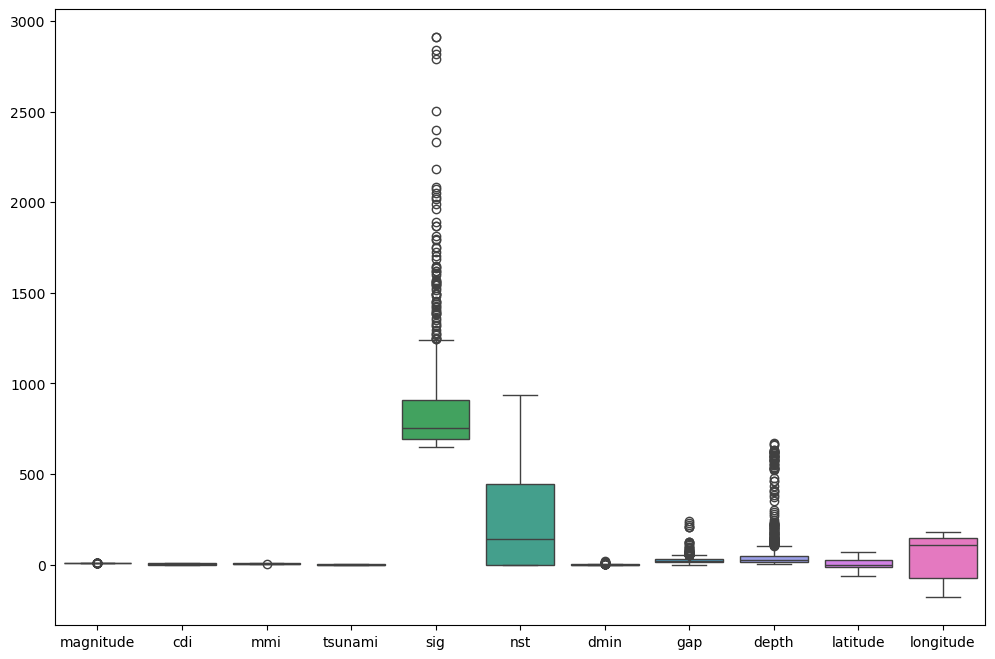

In [14]:
plt.figure(figsize=(12,8))
snp.boxplot(df[num_col])
plt.show()

In [48]:
df.drop(columns=['title','date_time'], inplace=True, errors='ignore')
df

,magnitude,cdi,mmi,alert,tsunami,sig,net,nst,dmin,gap,...,depth,latitude,longitude,location,continent,country,distance,direction,date,time
0,7.0,8,7,green,1,768,us,117,0.509,17.0,...,14.000,-9.7963,159.596,"Malango, Solomon Islands",Oceania,Solomon Islands,18 km,SW,2022-11-22,02:03:00
1,6.9,4,4,green,0,735,us,99,2.229,34.0,...,25.000,-4.9559,100.738,"Bengkulu, Indonesia",Asia,Indonesia,204 km,SW,2022-11-18,13:37:00
2,7.0,3,3,green,1,755,us,147,3.125,18.0,...,579.000,-20.0508,-178.346,"Kirakira, Solomon Islands",Oceania,Fiji,32 km,SS,2014-06-23,02:46:00
3,7.3,5,5,green,1,833,us,149,1.865,21.0,...,37.000,-19.2918,-172.129,"Neiafu, Tonga",Asia,Indonesia,205 km,ES,2014-06-23,02:46:00
4,6.6,0,2,green,1,670,us,131,4.998,27.0,...,624.464,-25.5948,178.278,"Kirakira, Solomon Islands",Asia,Indonesia,32 km,SS,2014-06-23,02:46:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777,7.7,0,8,green,0,912,us,427,0.000,0.0,...,60.000,13.0490,-88.660,"Puerto El Triunfo, El Salvador",Asia,Indonesia,28 km,SS,2001-01-13,17:33:00
778,6.9,5,7,green,0,745,ak,0,0.000,0.0,...,36.400,56.7744,-153.281,"Old Harbor, Alaska",North America,Indonesia,47 km,S,2014-06-23,02:46:00
779,7.1,0,7,green,0,776,us,372,0.000,0.0,...,103.000,-14.9280,167.170,"Port-Olry, Vanuatu",Asia,Vanuatu,16 km,NE,2014-06-23,02:46:00
780,6.8,0,5,green,0,711,us,64,0.000,0.0,...,33.000,6.6310,126.899,"Mindanao, Philippines",Asia,Indonesia,32 km,SS,2014-06-23,02:46:00


In [49]:
cat_col=df.select_dtypes(include=['object']).columns
cat_col

Index(['alert', 'net', 'magtype', 'location', 'continent', 'country',
       'distance', 'direction', 'date', 'time'],
      dtype='object')

In [50]:
df[cat_col].isnull().sum()

alert        0
net          0
magtype      0
location     0
continent    0
country      0
distance     0
direction    0
date         0
time         0
dtype: int64

In [17]:
from sklearn.impute import SimpleImputer

In [51]:
impute_mode=SimpleImputer(strategy='most_frequent')
impute_mode

SimpleImputer(strategy='most_frequent')

In [52]:
df[cat_col]=impute_mode.fit_transform(df[cat_col])
df[cat_col]

,alert,net,magtype,location,continent,country,distance,direction,date,time
0,green,us,mww,"Malango, Solomon Islands",Oceania,Solomon Islands,18 km,SW,2022-11-22,02:03:00
1,green,us,mww,"Bengkulu, Indonesia",Asia,Indonesia,204 km,SW,2022-11-18,13:37:00
2,green,us,mww,"Kirakira, Solomon Islands",Oceania,Fiji,32 km,SS,2014-06-23,02:46:00
3,green,us,mww,"Neiafu, Tonga",Asia,Indonesia,205 km,ES,2014-06-23,02:46:00
4,green,us,mww,"Kirakira, Solomon Islands",Asia,Indonesia,32 km,SS,2014-06-23,02:46:00
...,...,...,...,...,...,...,...,...,...,...
777,green,us,mwc,"Puerto El Triunfo, El Salvador",Asia,Indonesia,28 km,SS,2001-01-13,17:33:00
778,green,ak,mw,"Old Harbor, Alaska",North America,Indonesia,47 km,S,2014-06-23,02:46:00
779,green,us,mwb,"Port-Olry, Vanuatu",Asia,Vanuatu,16 km,NE,2014-06-23,02:46:00
780,green,us,mwc,"Mindanao, Philippines",Asia,Indonesia,32 km,SS,2014-06-23,02:46:00


In [55]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)
df

,magnitude,cdi,mmi,alert,tsunami,sig,net,nst,dmin,gap,magtype,depth,latitude,longitude,location,continent,country,distance,direction,date,time
0,7.00,8,7,green,1,768,us,117,0.509000,17.00,mww,14.000,-9.7963,159.5960,"Malango, Solomon Islands",Oceania,Solomon Islands,18 km,SW,2022-11-22,02:03:00
1,6.90,4,4,green,0,735,us,99,2.229000,34.00,mww,25.000,-4.9559,100.7380,"Bengkulu, Indonesia",Asia,Indonesia,204 km,SW,2022-11-18,13:37:00
2,7.00,3,3,green,1,755,us,147,3.125000,18.00,mww,579.000,-20.0508,-178.3460,"Kirakira, Solomon Islands",Oceania,Fiji,32 km,SS,2014-06-23,02:46:00
3,7.30,5,5,green,1,833,us,149,1.865000,21.00,mww,37.000,-19.2918,-172.1290,"Neiafu, Tonga",Asia,Indonesia,205 km,ES,2014-06-23,02:46:00
4,6.60,0,2,green,1,670,us,131,4.998000,27.00,mww,624.464,-25.5948,178.2780,"Kirakira, Solomon Islands",Asia,Indonesia,32 km,SS,2014-06-23,02:46:00
5,7.00,4,3,green,1,755,us,142,4.578000,26.00,mwb,660.000,-26.0442,178.3810,the Fiji Islands,Asia,Indonesia,32 km,SS,2014-06-23,02:46:00
6,6.80,1,3,green,1,711,us,136,4.678000,22.00,mww,630.379,-25.9678,178.3630,the Fiji Islands,Asia,Indonesia,32 km,SS,2014-06-23,02:46:00
7,6.70,7,6,green,1,797,us,145,1.151000,37.00,mww,20.000,7.6712,-82.3396,"Boca Chica, Panama",Asia,Panama,60 km,SS,2022-10-20,11:57:00
8,6.80,8,7,yellow,1,1179,us,175,2.137000,92.00,mww,20.000,18.3300,-102.9130,"Aguililla, Mexico",North America,Mexico,55 km,SS,2022-09-22,06:16:00
9,7.60,9,8,yellow,1,1799,us,271,1.153000,69.00,mww,26.943,18.3667,-103.2520,"Aguililla, Mexico",North America,Mexico,35 km,SS,2022-09-19,18:05:00
